In [2]:
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as AT
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = "/media/sda1/dataset/MIMII/6_dB/fan/id_00/abnormal/00000000.wav"
data, sr = torchaudio.load(file_path)
print(data.shape, sr)
# torch.Size([8, 160000]) 16000
# 8은 채널의 개수, 160000은 데이터의 길이, sampling rate가 16000Hz

torch.Size([8, 160000]) 16000


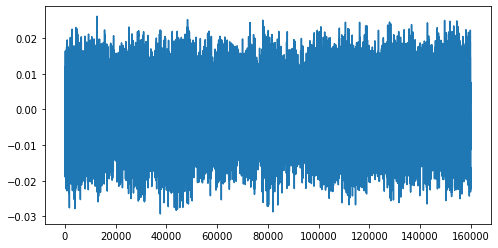

In [4]:
_,ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(data[0, :])
plt.show()

In [19]:
n_fft = int(np.ceil(0.025*sr))
win_length = int(np.ceil(0.025*sr))
hop_length = int(np.ceil(0.01*sr))
print(n_fft, win_length, hop_length)

spectrogram = nn.Sequential(AT.Spectrogram(n_fft=n_fft, win_length=win_length, hop_length=hop_length), AT.AmplitudeToDB())
mel_spectrogram = nn.Sequential(AT.MelSpectrogram(sample_rate=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_mels=80),AT.AmplitudeToDB())

400 400 160


In [18]:
spec = spectrogram(data)
mel = mel_spectrogram(data)
print(spec.shape, mel.shape)

torch.Size([8, 201, 1001]) torch.Size([8, 80, 1001])


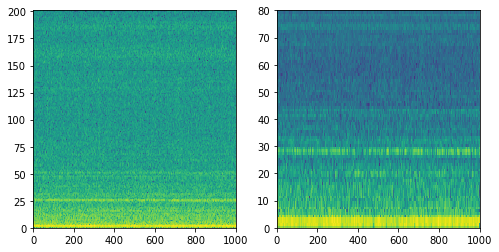

In [17]:
_,ax = plt.subplots(1,2, figsize=(8,4))
ax[0].pcolor(spec[0])
ax[1].pcolor(mel[0])
plt.show()

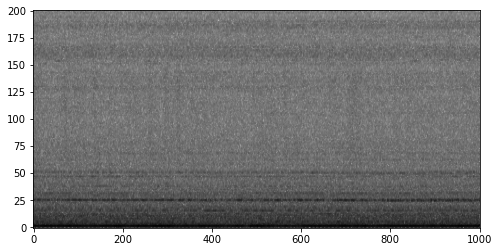

In [16]:
_,ax = plt.subplots(1,1, figsize=(8,4))
ax.imshow(spec[0,:,:], aspect='auto', origin='lower', cmap='gray_r')
plt.show()

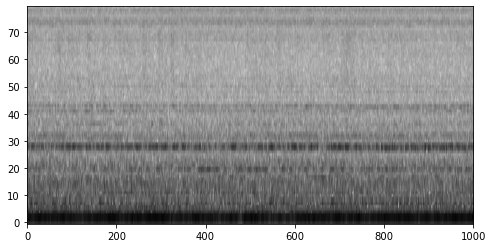

In [15]:
_,ax = plt.subplots(1,1, figsize=(8,4))
ax.imshow(mel[0,:,:], aspect='auto', origin='lower', cmap='gray_r')
plt.show()

In [ ]:
# 이미지 저장
# plt.savefig(f"저장할경로/이름.png")